In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn

In [2]:
# u(x) = x(1-x)
# def exact_solution(x):
#     return x * (1 - x)

In [3]:
class DeepRitzNet(nn.Module):
    def __init__(self):
        super(DeepRitzNet, self).__init__()
        self.layer1 = nn.Linear(1, 20)
        self.layer2 = nn.Linear(20, 20)
        self.layer3 = nn.Linear(20, 20)
        #self.layer4 = nn.Linear(40, 20)
        self.layer5 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = torch.tanh(self.layer3(x))
        #x = torch.tanh(self.layer4(x))
        x = (self.layer5(x))
        return x



In [4]:
# energy term 1/2(u',u') - (f,u)
def energy_term(u, x, f):
    u_prime = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True, retain_graph=True)[0]
    energy = 0.5 * torch.sum(u_prime*u_prime) - torch.sum(f * u)
    
    
    u_0 = u[0]
    u_1 = u[-1]
#     print(100 * (torch.square(u_0) + torch.square(u_1)))
#     print(100 * (torch.square(u_0) + torch.square(u_1))[0])
    energy += (10**5) * (torch.square(u_0) + torch.square(u_1))[0]
    
    return torch.mean(energy)



In [5]:
def train(model, x, f, epochs=10000, lr=0.0001):
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer.zero_grad()
        u = model(x)
        u.requires_grad_(True)
        loss = (energy_term(u, x, f))
        loss.backward()
        optimizer.step()

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")



Epoch 0/10000, Loss: 3012.843017578125
Epoch 1000/10000, Loss: -90631.3359375
Epoch 2000/10000, Loss: -143899.90625
Epoch 3000/10000, Loss: -188689.234375
Epoch 4000/10000, Loss: -231715.453125
Epoch 5000/10000, Loss: -274139.75
Epoch 6000/10000, Loss: -316327.21875
Epoch 7000/10000, Loss: -358415.75
Epoch 8000/10000, Loss: -400457.46875
Epoch 9000/10000, Loss: -442478.0


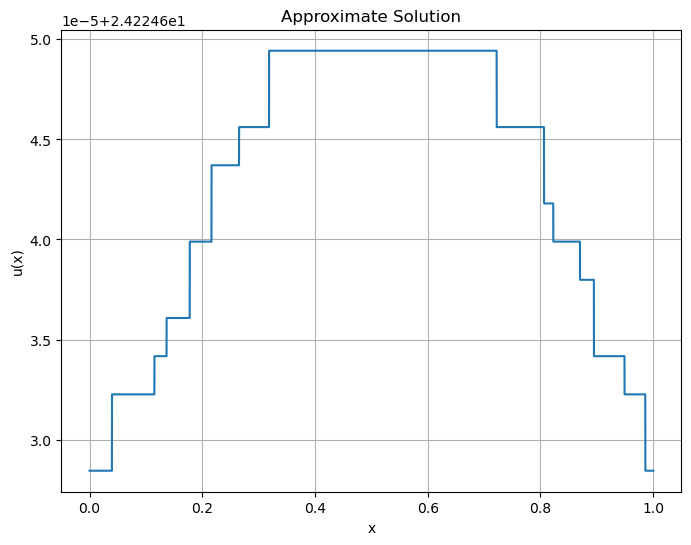

In [6]:
def main():
    
    x = torch.linspace(0, 1, 10000).reshape(-1, 1)
#    print(x)
    x.requires_grad_(True)
    
    f = 2 * torch.ones_like(x)

    
    model = DeepRitzNet()

    
    train(model, x, f)

    
    u_approx = model(x)

    
    x_np = x.detach().numpy()
    u_approx_np = u_approx.detach().numpy()

    plt.figure(figsize=(8, 6))

    plt.plot(x_np, u_approx_np)
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('Approximate Solution')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


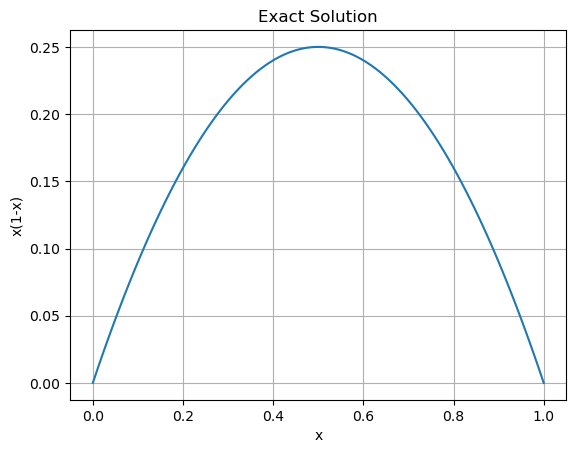

In [7]:
def func(x):
    return x * (1 - x)

x = np.linspace(0, 1, 100)
y = func(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('x(1-x)')
plt.title('Exact Solution')
plt.grid(True)
plt.show()
